<a href="https://colab.research.google.com/github/Prishi99/AI_Pose_Estimation/blob/main/Insurancecostprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.shape

(1338, 7)

In [6]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 1338
Number of Columns 7


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [13]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [15]:
data['smoker']=data['smoker'].map({'no':0,'yes':1})

In [16]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [17]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [19]:
data['region']=data['region'].map({'southwest': 1,'southeast':2, 'northwest':3,'northeast':4})

In [20]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [21]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [22]:
X = data.drop(['charges'],axis=1)

In [23]:
y = data['charges']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
X_train

,age,sex,bmi,children,smoker,region
1324,31,1,25.935,1,0,3
709,36,0,27.740,0,0,4
325,40,1,34.105,1,0,4
499,62,0,39.200,0,0,1
238,19,1,29.070,0,1,3
...,...,...,...,...,...,...
244,63,0,27.740,0,1,4
815,20,0,31.460,0,0,2
287,63,0,26.220,0,0,3
538,46,0,28.050,1,0,2


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [30]:
!pip install -U scikit-learn


In [31]:
lr =LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train, y_train)
rf = RandomForestRegressor ()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor ()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [33]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = lr.predict(X_test)
y_pred4 = lr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})


In [35]:
df1

,Actual,Lr,svm,rf,gr
819,55135.40209,32056.420422,9254.768403,32056.420422,32056.420422
96,12105.32000,12759.538051,9390.957943,12759.538051,12759.538051
826,43813.86610,37322.995887,9402.977510,37322.995887,37322.995887
467,12643.37780,14633.328989,9403.544713,14633.328989,14633.328989
907,7633.72060,10038.947893,9326.208764,10038.947893,10038.947893
...,...,...,...,...,...
976,7804.16050,13050.091892,9356.091115,13050.091892,13050.091892
504,5974.38470,7365.609168,9282.685843,7365.609168,7365.609168
486,12475.35130,10571.058285,9383.433403,10571.058285,10571.058285
548,3213.62205,4279.545355,9209.566165,4279.545355,4279.545355


In [39]:
import matplotlib.pyplot as plt

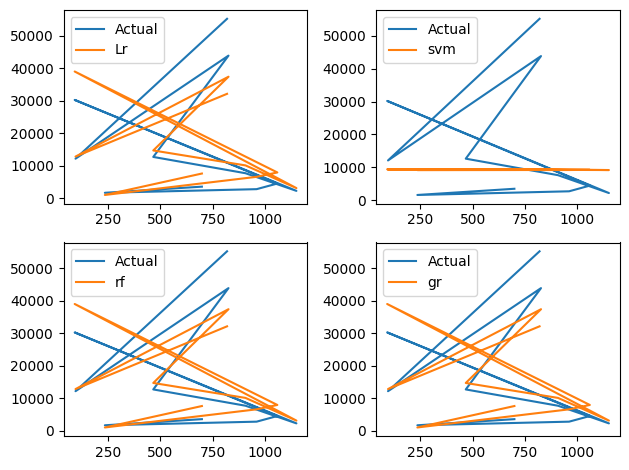

In [45]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svm")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")
plt.legend()


plt.tight_layout ()

plt.legend()

In [46]:
from sklearn import metrics

In [48]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [49]:
print(score1,score2,score3,score4)

0.7854796078679189 -0.11658560553372066 0.7854796078679189 0.7854796078679189


In [50]:
s1 = metrics.mean_absolute_error(y_test, y_pred1)
s2 = metrics.mean_absolute_error(y_test, y_pred2)
s3 = metrics.mean_absolute_error(y_test, y_pred3)
s4 = metrics.mean_absolute_error(y_test, y_pred4)

In [51]:
print(s1,s2,s3,s4)

4040.777454816507 8472.302557656987 4040.777454816507 4040.777454816507


In [54]:
data = {'age': 40,'sex':1,'bmi':40.30,'children':4,'smoker':1,'region':2}

df = pd.DataFrame(data,index=[0])
df


,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [55]:
new_pred =gr.predict(df)
print(new_pred)

[44354.08255381]


In [56]:
gr = GradientBoostingRegressor ()
gr.fit(X,y)

GradientBoostingRegressor()

In [57]:
import joblib

In [58]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [59]:
model = joblib.load('model_joblib_gr')

In [60]:
model.predict(df)

array([42148.361888])